# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:10px 10px;"><b>Logistic Regression </b></p>

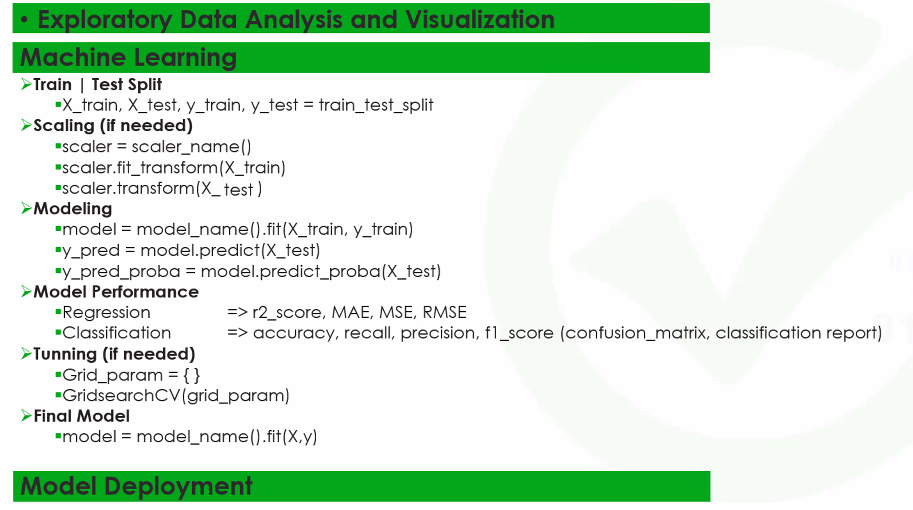

![download (1).png](<attachment:download (1).png>)
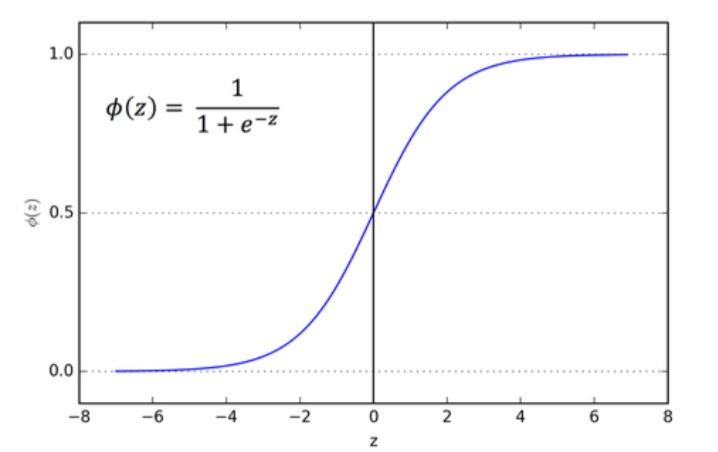


$$ z = \beta_0 + \beta_1x$$


$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

### **Sigmoid Fonksiyon**

$$ \phi(z) = \frac{1}{1+e^{-z}}$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Load the data
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

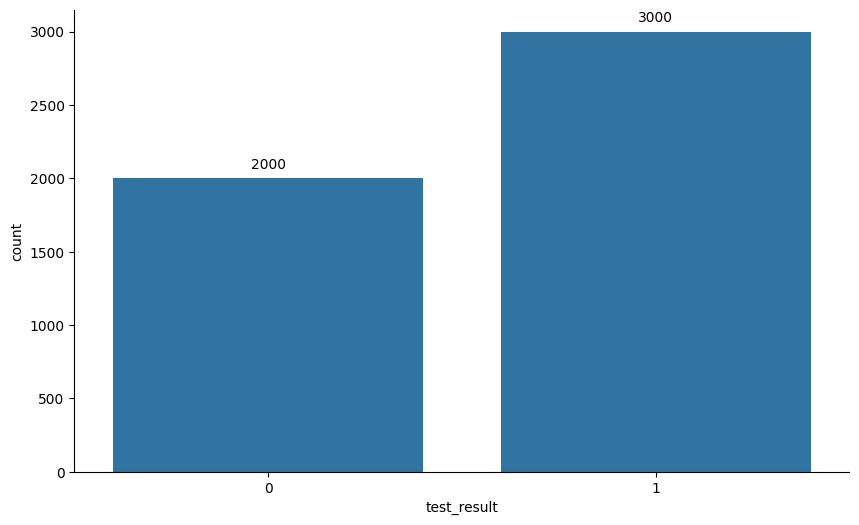

In [7]:
ax = sns.countplot(x=df["test_result"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

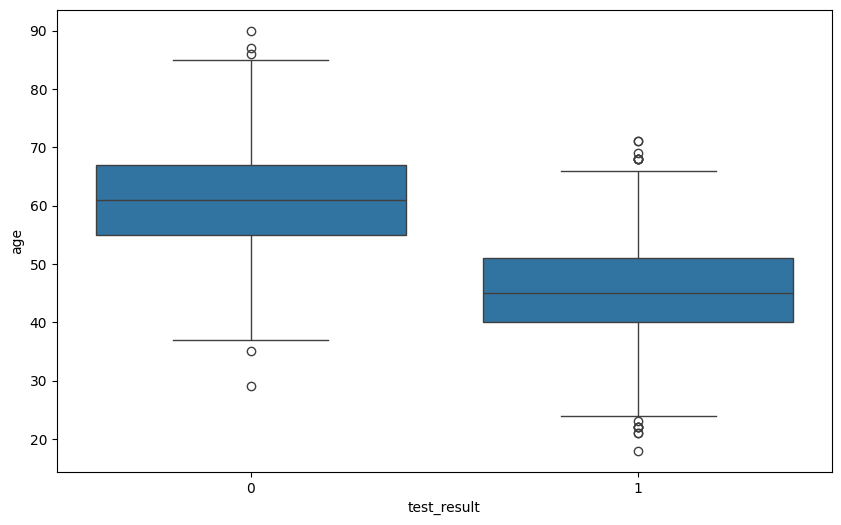

In [8]:
sns.boxplot(x="test_result", y="age", data=df);

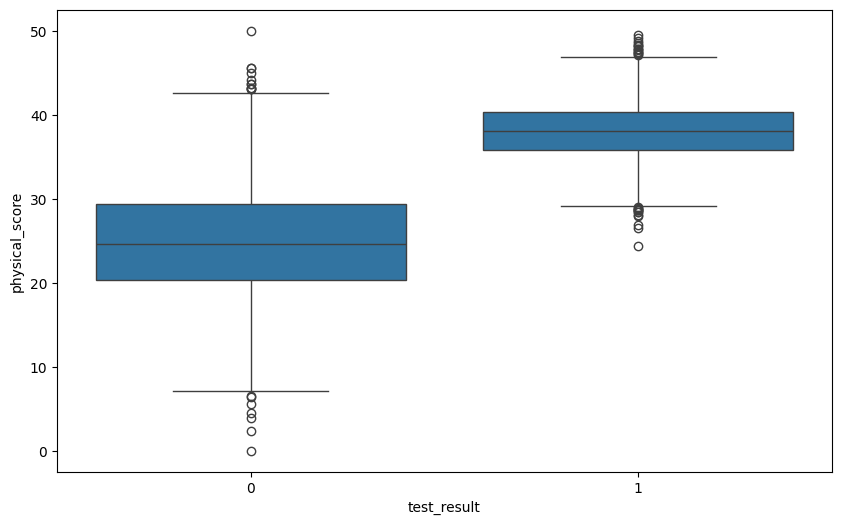

In [9]:
sns.boxplot(x="test_result", y="physical_score", data=df);

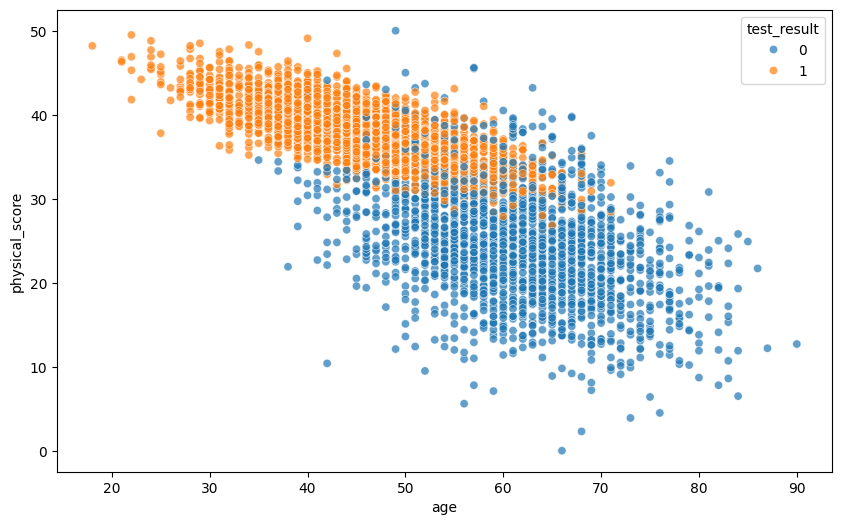

In [10]:
sns.scatterplot(x= "age", y = "physical_score", data = df, hue = "test_result", alpha = 0.7);

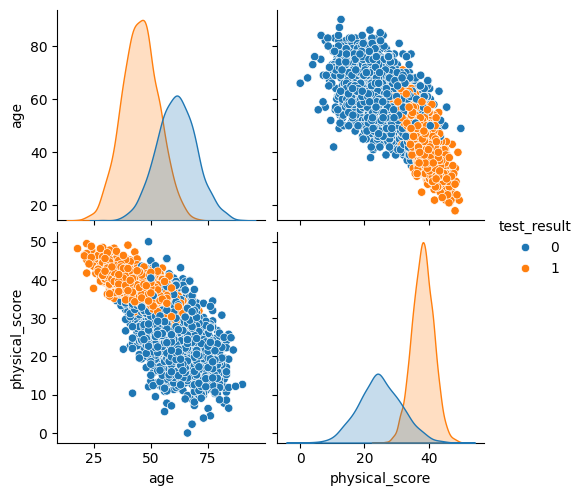

In [11]:
sns.pairplot(df, hue="test_result");

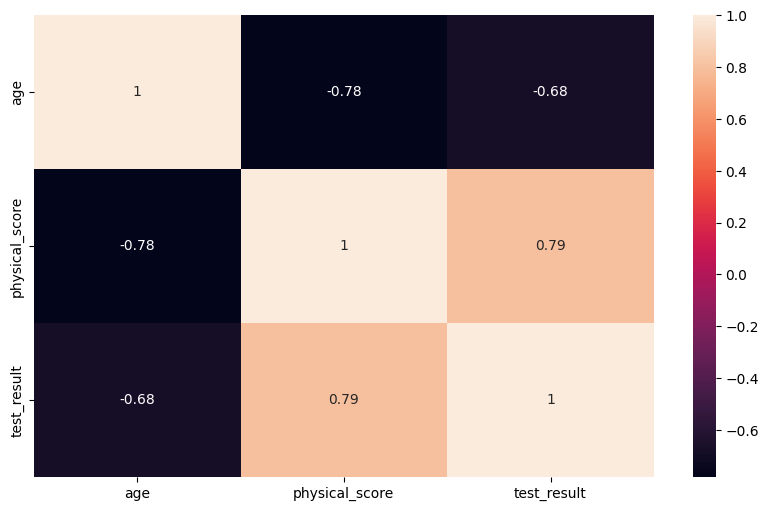

In [12]:
sns.heatmap(df.corr(), annot=True);

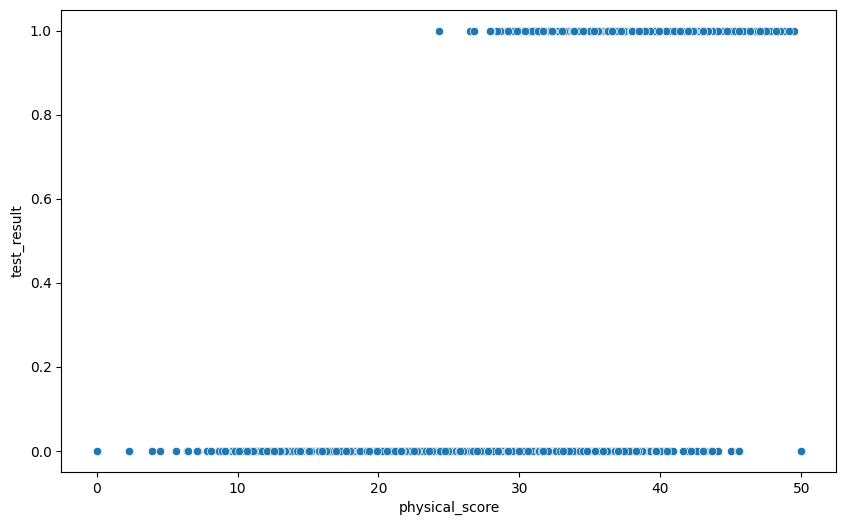

In [13]:
sns.scatterplot(x = 'physical_score', y='test_result', data=df);

In [14]:
#!pip install sweetviz 
#!pip install pyproject-toml
#!pip install dataprep 

#!pip install dtale

In [15]:
import sweetviz as sv
df = pd.read_csv('hearing_test.csv')
report = sv.analyze(df)
report.show_html("Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Train-Test Split & Scaling**

In [16]:
X = df.drop('test_result', axis = 1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Modelling**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [20]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
log_model.coef_ # the first score is age, next physical_score

array([[-0.94953524,  3.45991194]])

In [23]:
log_model.intercept_

array([0.48867341])

In [24]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.39, 0.61],
       [0.37, 0.63],
       [0.58, 0.42],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.02,

### **Model Performance on Classification Tasks**

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

#### **Accuracy**

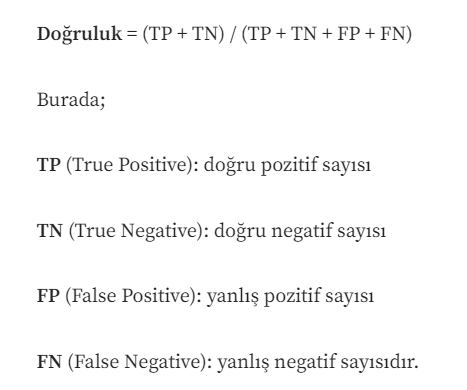

In [27]:
accuracy_score(y_test, y_pred) # accuracy score

0.93

In [28]:
log_model.score(X_test_scaled, y_test) # accuracy ile ayni, log model score

0.93

#### <font color='Green'>Precision</font>


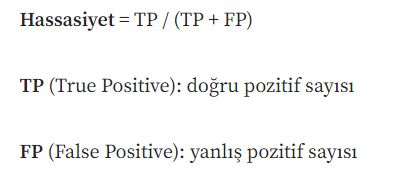

In [29]:
precision_score(y_test, y_pred)

0.9331210191082803

#### <font color='Green'>**Recall Score (Duyarlilik)**</font>

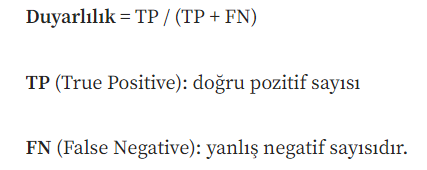

dogru bilinen pozitiflerin toplam gercek pozitiflere orani 

In [30]:
recall_score(y_test, y_pred)

0.9543973941368078

#### <font color='Green'>**F1 Score**</font>

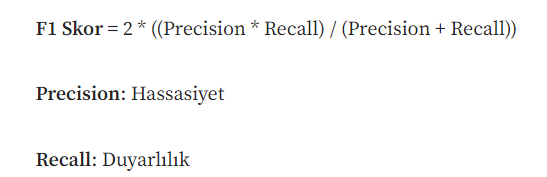

In [31]:
f1_score(y_test, y_pred)

0.9436392914653785

#### <font color='Green'>**Log Loss**</font>

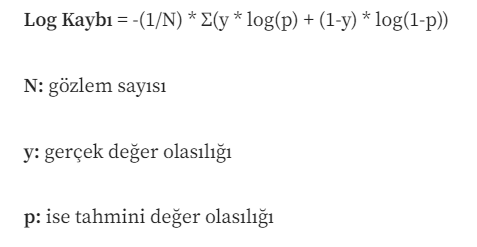

In [32]:
log_loss(y_test, y_pred) 
# 0 mukemmel uyum
# 0 - 0.5 arasi kabul edilebilir
# 0.5 - 1 buyuk hatalar var denebilir
# 1'den buyuk(veya esit) ise sıkıntı var, model performansi kotu

2.523055737238201

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [34]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [35]:
TP = 10
TN = 70
FP = 0
FN = 10
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recc = TP / (TP + FN)
F1 = 2 * ((prec * recc) / (prec + recc))
print("Accuracy : {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall   : {:.2f}".format(recc))
print("F1 Score : {:.2f}".format(F1))

Accuracy : 0.89
Precision: 1.00
Recall   : 0.50
F1 Score : 0.67


In [36]:
# recall gercek + orneklerinin ne kadar + oldugunu gosterir. 50+'den 50 sini bilirsem recall 1 olur. hastalarda kullanilabilir tahminde
# precision + olanlarin gercekten ne kadar + oldugunu olcuyor. spam mailleri tahminde kullanilir.

**Doğruluk (Accuracy)**
* **Ne Zaman Kullanılır:** Dengeli veri setlerinde, yani her sınıfın yaklaşık eşit sayıda örneğe sahip olduğu durumlarda kullanılır.
* **Açıklama:** Doğruluk, modelin toplam tahminlerinin ne kadarının doğru olduğunu gösterir. Ancak, dengesiz veri setlerinde yanıltıcı olabilir çünkü model sadece çoğunluk sınıfını doğru tahmin ederek yüksek doğruluk elde edebilir.

**Hassasiyet (Precision) ve Duyarlılık (Recall)**
* **Ne Zaman Kullanılır:** Özellikle bir sınıfın (genellikle pozitif sınıf) doğru tahmin edilmesinin önemli olduğu durumlarda kullanılır.
* **Açıklama:** Hassasiyet, pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranını; duyarlılık ise gerçekten pozitif olan örneklerin doğru tahmin edilme oranını gösterir.

**F1 Skoru**
* **Ne Zaman Kullanılır:** Hassasiyet ve duyarlılığın her ikisinin de önemli olduğu durumlarda, özellikle dengesiz veri setlerinde kullanılır.
* **Açıklama:** F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve her iki metriği dengeler. Dengesiz veri setlerinde, azınlık sınıfının göz ardı edilmesini önlemek için kullanılır.

**Macro Average (Makro Ortalama)**
* **Ne Zaman Kullanılır:** Dengesiz veri setlerinde, her sınıfın eşit derecede önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metriklerin (örneğin, F1 skoru) basit aritmetik ortalaması alınır. Her sınıf eşit ağırlıkta değerlendirilir, böylece azınlık sınıflarının performansı da dikkate alınır.

**Weighted Average (Ağırlıklı Ortalama)**
* **Ne Zaman Kullanılır:** Her sınıfın veri setindeki temsili oranına göre ağırlıklandırılmasının önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metrikler, o sınıfın veri setindeki oranına göre ağırlıklandırılır. Bu, çoğunluk sınıfının model performansı üzerinde daha büyük etkiye sahip olmasını sağlar.
Her bir metrik, modelin farklı yönlerini vurgular ve hangi metriğin kullanılacağı, problemin doğası ve özel ihtiyaçlarınıza bağlıdır. Özellikle dengesiz veri setlerinde, modelin her sınıf üzerindeki performansını anlamak için birden fazla metriği kullanmak ve karşılaştırmak yararlı olabilir.

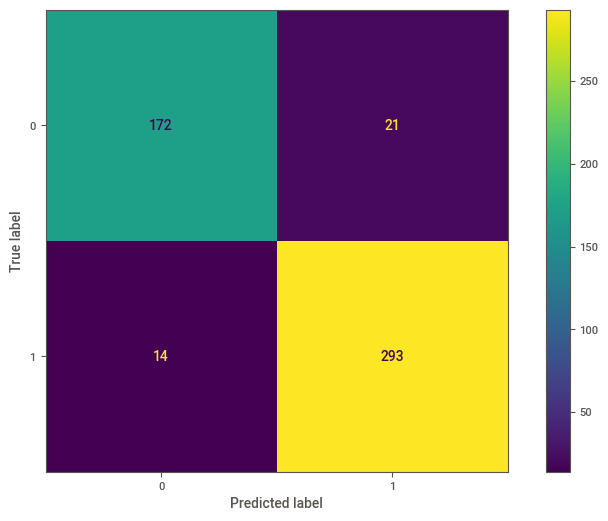

In [37]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

TN = 0 i 0 bilmek
TP = 1 i 1 bilmek
FN = 1 i 0 bilmek
FP = 0 i 1 bilmek

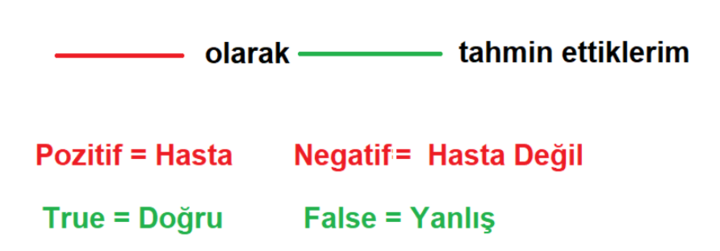

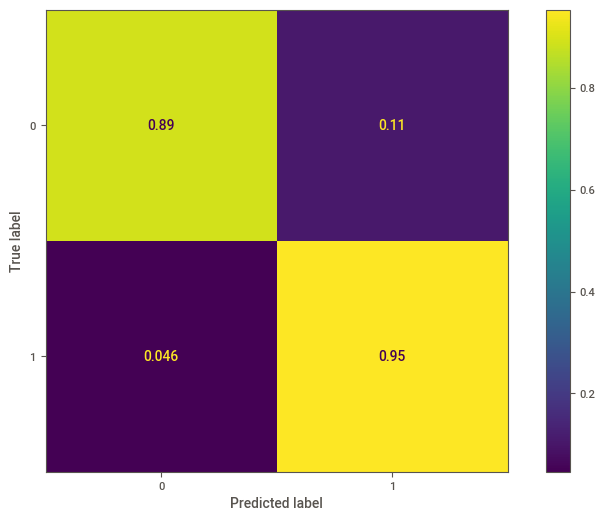

In [38]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');

bu kodun içine normalize = True dediğimizde oransal olarak değerini verir kendi içlerinde yani ilk satır için 172 ile 21 in. 172/172+21=0,89
burada çıkan görseli soldan sağa doğru okuyoruz neden normalize içine true dediğimiz için
yani il satır için her ikisnin toplamı 1
Bunun yanında ben 0 olanların %89 unu bilmişim. %11 ini bilememişim
1 olanların %95 ini bilmişim yaklaşık %5 ini bilememişim

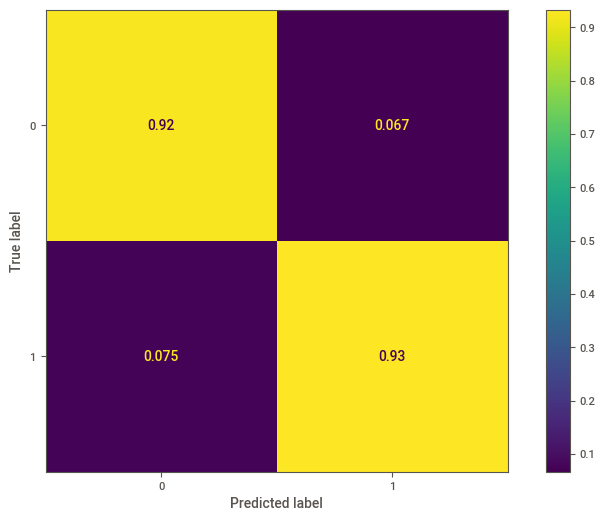

In [39]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='pred');

Ilk sütun icin 0 dediklerimizin 92% si dogru iken, 7.5% yanlis

Ikinci sütun icin 1 dediklerimizin 93% si dogru iken, 6.7% yanlis

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [41]:
y_train_pred = log_model.predict(X_train_scaled)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



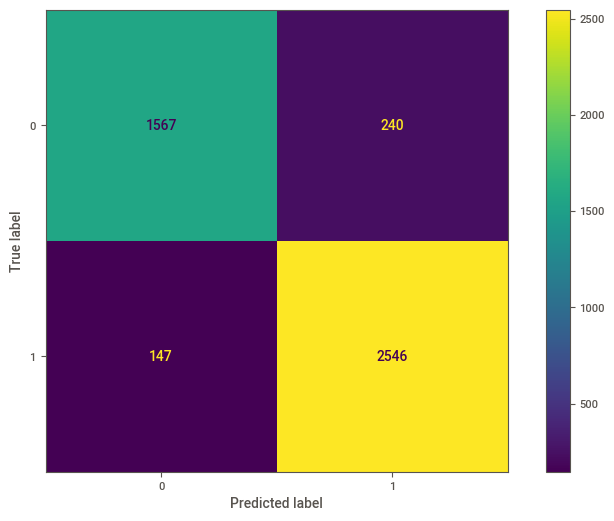

In [42]:
ConfusionMatrixDisplay.from_estimator(log_model, X_train_scaled, y_train);

- Log loss, modelin tahminlerinin gerçek sınıflarla ne kadar iyi uyum sağladığını ölçer. Daha spesifik olarak, modelin tahminlerinin gerçek etiketlerle olan olasılık uyumunu değerlendirir.
- Hesaplama: Gerçek sınıf etiketleri ve tahmin edilen olasılıklar arasındaki uyumsuzluğu, olasılıkların logaritmasını alarak hesaplar.
Log Loss değerleri için ortalama olarak "iyi" veya "kötü" olarak kabul edilen belirli bir eşik sunmak zor olabilir, çünkü bu değerlendirmeler problemin bağlamına, veri setinin özelliklerine ve hedeflenen uygulamaya göre değişiklik gösterebilir. Ancak, genel bir kılavuz olarak bazı yönlerden bahsedebiliriz:
- **Log Loss = 0**: İdeal durum, mükemmel bir modeli ifade eder. Modelin tüm tahminleri gerçek değerlerle tam bir uyum içindedir.
0 < Log Loss ≤ 0.5: Genellikle kabul edilebilir bir performans aralığı olarak değerlendirilir. Değerin düşük olması modelin iyi performans gösterdiğini gösterir. Bu aralık, modelin çoğu tahmininde doğru sınıf olasılıklarını makul bir doğrulukla verdiğini gösterir.
- **0.5 < Log Loss < 1.0**: Bu aralık, modelin bazı tahminlerde belirgin hatalar yaptığını gösterir ancak yine de bazı faydalı bilgiler sağlayabilir. Bu durum, modelin iyileştirilmesi gerektiğinin bir işaretidir.
- **Log Loss ≥ 1.0**: Genellikle kötü bir model performansını gösterir. Bu, modelin tahminlerinin gerçek sınıflardan önemli ölçüde sapma gösterdiğini ve bu tahminlerin çoğunun yanlış olduğunu belirtir.
Bu değerler yalnızca çok genel bir kılavuzdur ve özellikle belirli bir problem için "iyi" veya "kötü" olarak kabul edilen değerler bu genel kılavuzdan farklı olabilir. Örneğin, bazı durumlarda, 0.2 veya daha düşük bir Log Loss değeri çok iyi bir sonuç olarak kabul edilebilirken, daha karmaşık veya dengesiz veri setlerinde 0.6 değeri bile makul bir başarı olarak görülebilir.
Modelinizi değerlendirirken, Log Loss değerlerini modelin hedeflediği uygulamanın gereksinimleri ve beklenen performans seviyesi çerçevesinde değerlendirmek önemlidir. Ayrıca, modelin performansını tam olarak anlamak için Log Loss ile birlikte diğer metrikleri (örneğin, doğruluk, hassasiyet, duyarlılık, F1 skoru) de dikkate almak yararlıdır.

### **CV**

In [43]:
from sklearn.model_selection import cross_validate

In [44]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [47]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['accuracy','precision','recall', 'f1'], cv=10)
df.scores = pd.DataFrame(scores, index= range(1,11))
df.scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.019,0.018,0.900,0.889,0.952,0.919
2,0.019,0.025,0.924,0.921,0.956,0.938
3,0.014,0.017,0.936,0.917,0.981,0.948
4,0.015,0.042,0.931,0.938,0.948,0.943
5,0.010,0.012,0.938,0.941,0.955,0.948
6,0.009,0.014,0.902,0.934,0.900,0.917
7,0.008,0.016,0.898,0.889,0.948,0.917
8,0.009,0.012,0.911,0.896,0.963,0.928
9,0.020,0.013,0.891,0.910,0.907,0.909
10,0.009,0.014,0.916,0.911,0.952,0.931


In [48]:
df.scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [49]:
print("Test set")
print(classification_report(y_test, y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

Test set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



### **ROC (Receiver Operating Curve) & AUC (Area Under Curve)**

ROC (Receiver Operating Characteristic) ve AUC (Area Under the Curve) sınıflandırma modellerinin performansını değerlendirmek için kullanılan önemli araçlardır. İkili sınıflandırma problemlerinde yaygın olarak kullanılırlar ve modelin sınıfları ne kadar iyi ayırt ettiğini gösterirler.
**ROC (Receiver Operating Characteristic)**
ROC, sınıflandırma modelinin farklı eşik değerlerindeki performansını gösteren bir grafiktir. ROC eğrisi, gerçek pozitif oranı (True Positive Rate, TPR) ile yanlış pozitif oranı (False Positive Rate, FPR) arasındaki ilişkiyi görselleştirir.
- True Positive Rate (TPR), aynı zamanda Recall veya Hassasiyet olarak da bilinir ve şöyle hesaplanır: TPR = TP / (TP + FN). Burada TP, gerçek pozitifler ve FN, yanlış negatiflerdir.
- False Positive Rate (FPR) ise şöyle hesaplanır: FPR = FP / (FP + TN). Burada FP, yanlış pozitifler ve TN, gerçek negatiflerdir.
ROC eğrisi, modelin farklı eşik değerlerinde (sınıflandırma sınırı) TPR ve FPR değerlerini çizer. İdeal bir model, TPR'yi maksimize ederken FPR'yi minimize eder, bu da ROC eğrisinin sol üst köşeye yakın olmasını sağlar.
**AUC (Area Under the Curve)**
AUC, ROC eğrisinin altında kalan alanın büyüklüğüdür ve genellikle 0 ile 1 arasında bir değer alır. AUC, modelin rastgele seçilen pozitif bir örneği rastgele seçilen negatif bir örneğe tercih etme olasılığını ölçer.
- Mükemmel bir modelin AUC değeri 1'dir: Bu, modelin tüm pozitif ve negatif örnekleri mükemmel bir şekilde ayırt ettiği anlamına gelir.
- Rastgele bir tahmin yapan modelin AUC değeri yaklaşık 0.5 olacaktır: Bu, modelin pozitif ve negatif örnekleri rastgele tahmin ettiği anlamına gelir.
AUC, bir modelin **farklı sınıflandırma eşiklerindeki genel performansını tek bir sayı ile özetler** ve bu nedenle model karşılaştırmalarında sıklıkla kullanılır. Yüksek bir AUC değeri, modelin genellikle pozitif ve negatif sınıfları iyi bir şekilde ayırt ettiğini gösterir.

In [50]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve

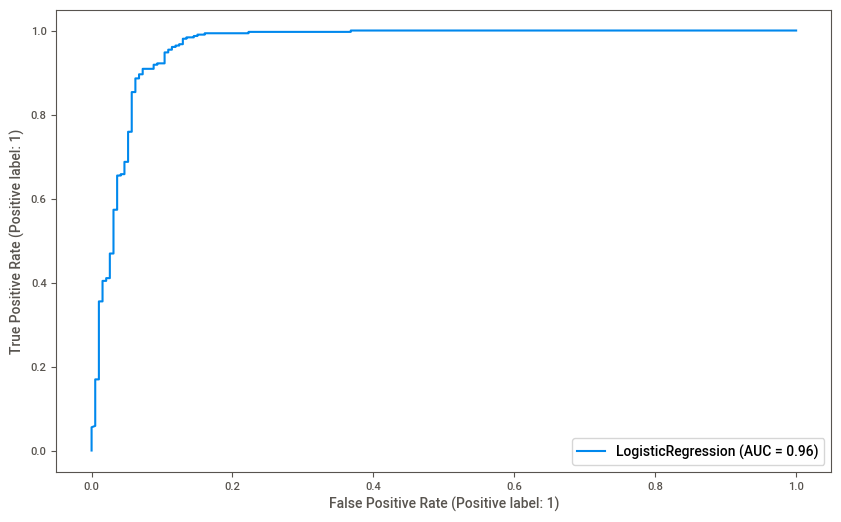

In [52]:
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test);

In [53]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

### **Precision - Recall Curve**

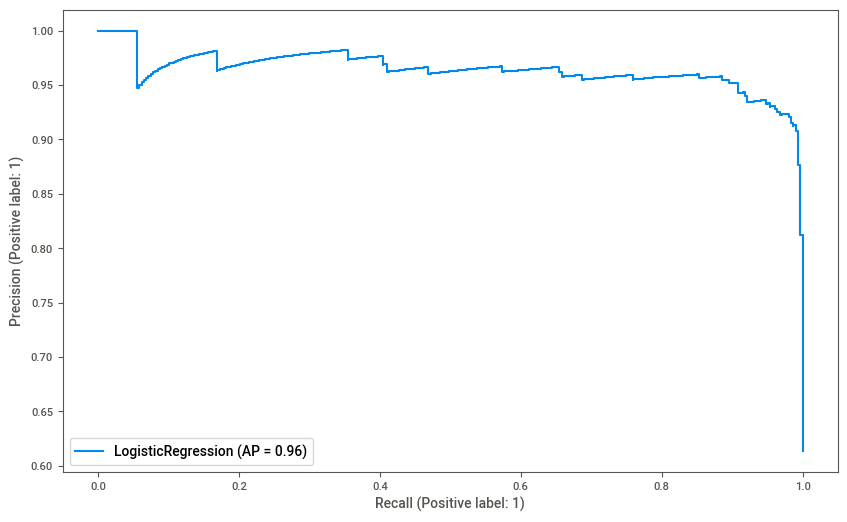

In [54]:
PrecisionRecallDisplay.from_estimator(log_model, X_test_scaled, y_test);